# 데이터 시각화 연습문제

### 교육 수준 별로 나이와 임금의 관계를 탐색하기 위한 시각화를 구현하고, 시각화 결과에서 알 수 있는 사실을 설명하세요.


In [2]:
from hossam import load_data
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(fpath)
fprop = fm.FontProperties(fname=fpath) # 폰트의 속성을 읽어옴
fname = fprop.get_name() # 읽어온 속성에서 폰트의 이름만 추출
plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [4]:
origin = load_data("wage")
origin

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [25]:
# 1) 인종별 평균 임금
df1.groupby('race')['wage'].mean()

# 2) 인종별 중앙값 임금
df1.groupby('race')['wage'].median()

# 3) 인종별 logwage 평균
df1.groupby('race')['logwage'].mean()

# 4) 인종별 인원수
df1['race'].value_counts()


/var/folders/q0/gfh2kgjd38q9q1jlkn069tmr0000gn/T/ipykernel_17313/890879158.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('race')['wage'].mean()
/var/folders/q0/gfh2kgjd38q9q1jlkn069tmr0000gn/T/ipykernel_17313/890879158.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('race')['wage'].median()
/var/folders/q0/gfh2kgjd38q9q1jlkn069tmr0000gn/T/ipykernel_17313/890879158.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

race
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: count, dtype: int64

In [5]:
df1 = origin.astype({'year': 'category', 'maritl': 'category',
'race': 'category', 'education': 'category', 'region':
'category', 'jobclass': 'category', 'health': 'category',
'health_ins': 'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 95.3 KB


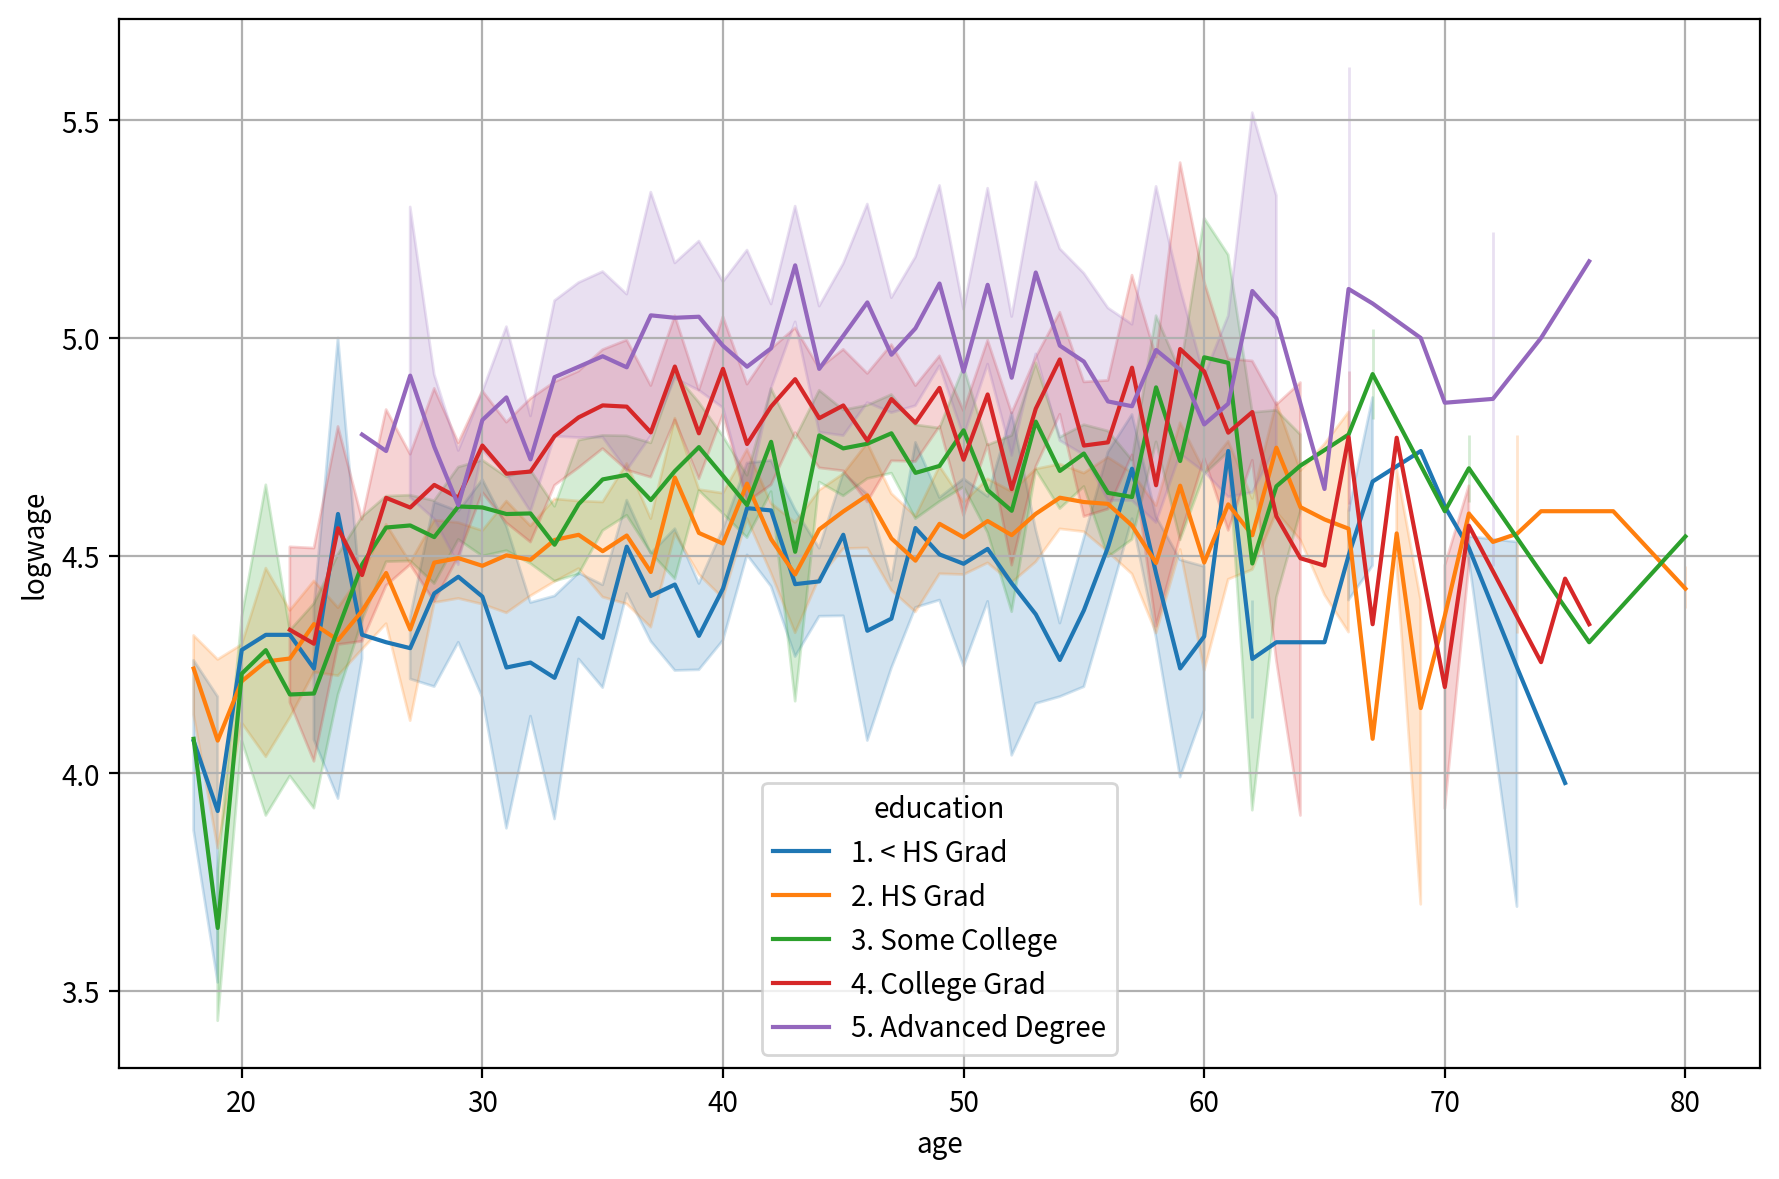

In [11]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1800
height_px = 1200
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

#2) 그래프 그리기 -> seaborn 사용
sb.lineplot(data=df1, x='age',y='logwage',hue='education')

#3) 그래프 꾸미기
ax.grid(True)
# 4) 출력

plt.tight_layout()
plt.show() # 그래프 화면 출력
plt.close()

본 그래프에 따르면 대학교 이후 추가 학력을 가진(5번 그래프) 제일 높은 것으로 나타나며 그래프 시작선이 20대 중반 이후로 부터 시작한것으로 보아 사회 진입 나이가 있는 것으로 나타난다 하지만 그 이후 꾸준히 상향하여 60대 이후로 전 연령에서 높은 연봉을 확인 할 수 있다.

인종(race)별로 직업군(jobclass)에 따른 임금(wage) 분포를 비교할 수 있는 시각화를 구현하고, 시각
화 결과에서 알 수 있는 사실을 설명하세요

In [17]:
jobclass = sorted(list(df1['jobclass'].unique()))
jobclass

['1. Industrial', '2. Information']

/var/folders/q0/gfh2kgjd38q9q1jlkn069tmr0000gn/T/ipykernel_17313/890879158.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('race')['wage'].mean()
/var/folders/q0/gfh2kgjd38q9q1jlkn069tmr0000gn/T/ipykernel_17313/890879158.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('race')['wage'].median()
/var/folders/q0/gfh2kgjd38q9q1jlkn069tmr0000gn/T/ipykernel_17313/890879158.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

race
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: count, dtype: int64

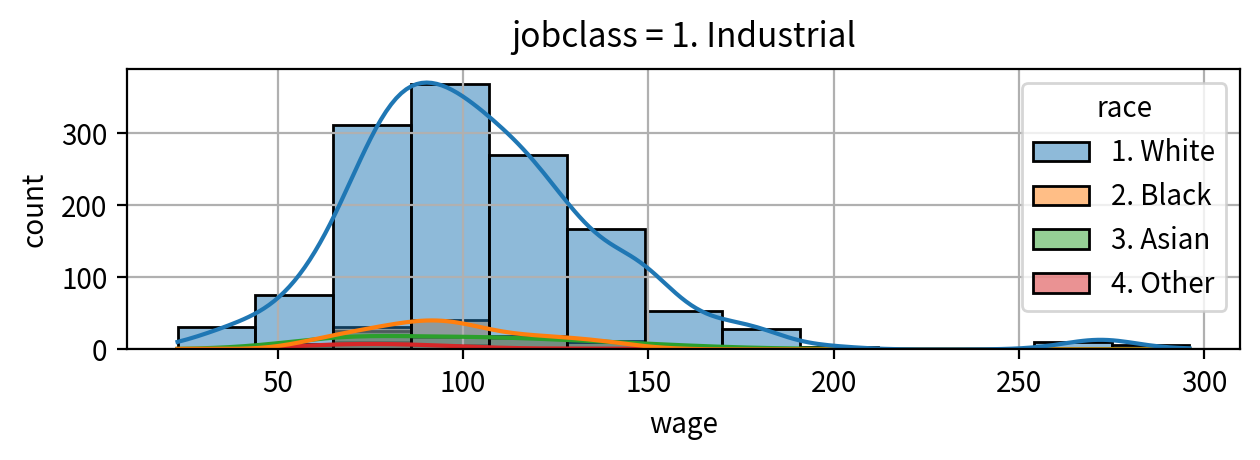

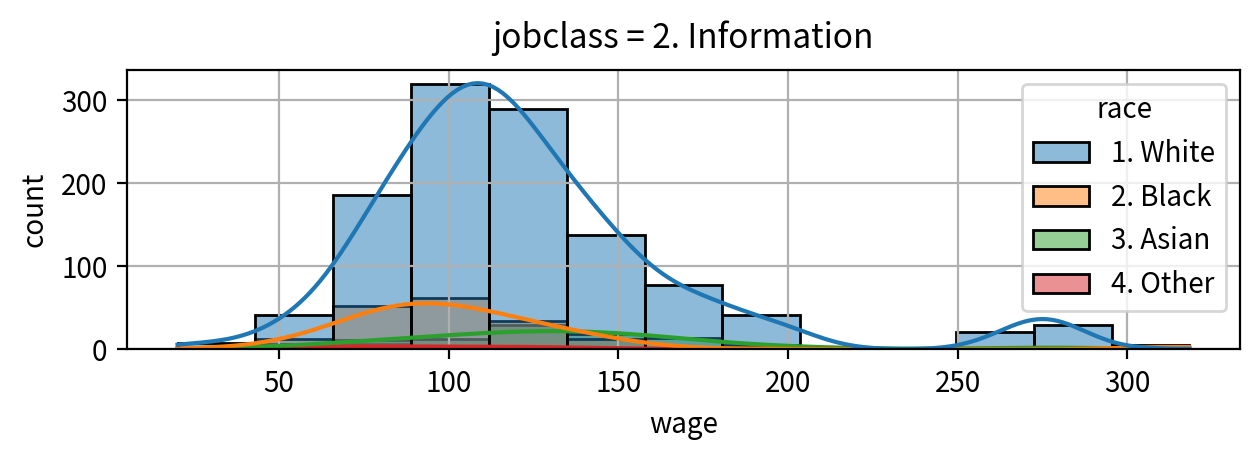

In [24]:
for m in jobclass:
    jobf = df1.query("jobclass == @m")
    
    # 1) 그래프 초기화
    width_px = 1280  # 그래프 가로 크기
    height_px = 480  # 그래프 세로 크기
    rows = 1
    cols = 1
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
    
    # 2) 히스토그램 + KDE: 인종별 임금 분포
    sb.histplot(
        data=jobf,
        x="wage",           # 임금
        hue="race",         # ✅ 인종별 색으로 구분
        bins=13,
        kde=True,           # 상단에 밀도 곡선

    )
    
    # 3) 그래프 꾸미기
    ax.set_title(f"jobclass = {m}", fontsize=12, pad=8)  # maritl → jobclass로 수정
    ax.set_xlabel("wage")
    ax.set_ylabel("count")
    ax.grid(True)
    
    # 4) 출력
    plt.tight_layout()
    plt.show()
    plt.close()


연도(year)에 따른 임금(wage)의 변화 추이를 교육 수준(education)별로 나누어 시각화하고, 시각화
결과에서 알 수 있는 사실을 설명하세요.

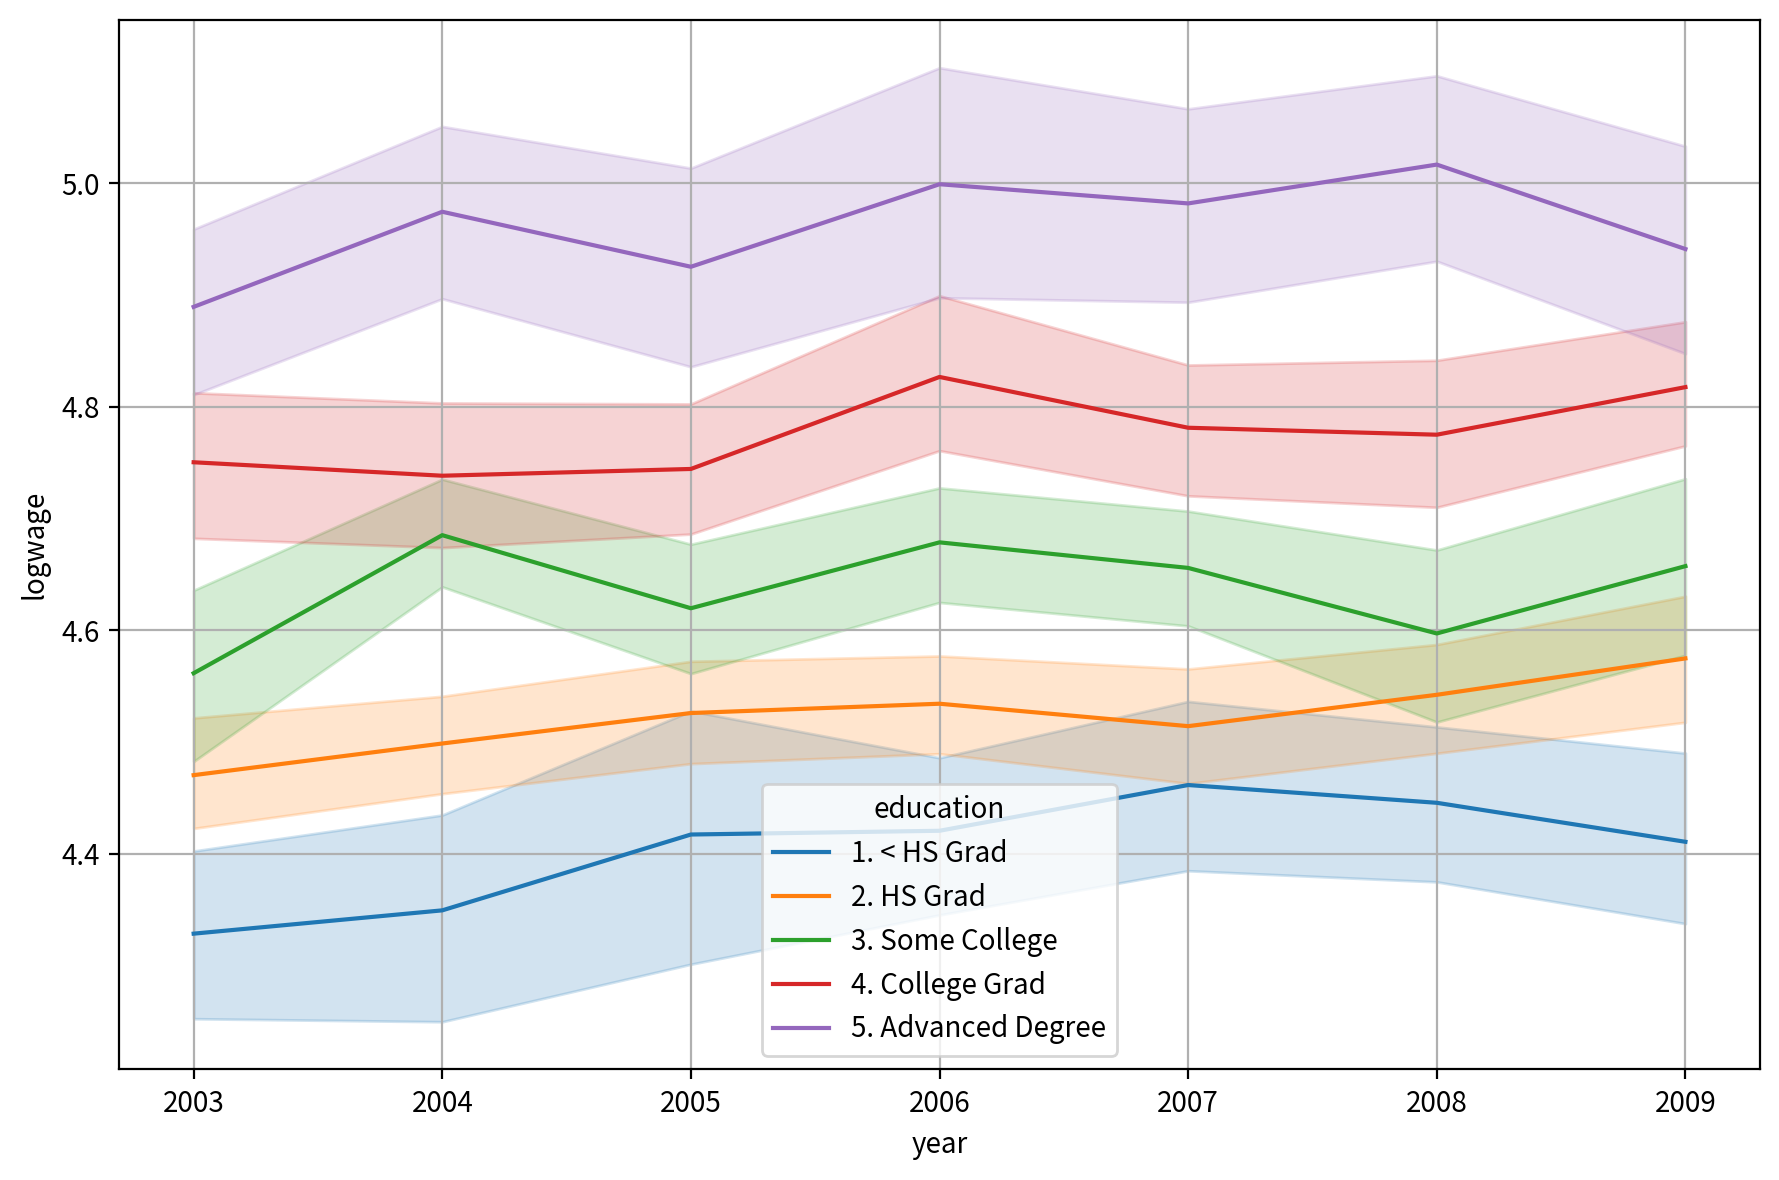

In [20]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1800
height_px = 1200
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

#2) 그래프 그리기 -> seaborn 사용
sb.lineplot(data=df1, x='year',y='logwage',hue='education')

#3) 그래프 꾸미기
ax.grid(True)
# 4) 출력

plt.tight_layout()
plt.show() # 그래프 화면 출력
plt.close()